# Differential expression analysis


You have run the nf-core/rnaseq pipeline and checked the first quality control metrics of your fastq files. This was, however, only the primary analysis and we want to take it further.

Due to the computational demand of the pipeline, you only ran the pipeline on two of the 16 samples in the study yesterday. We provide you an essential output of nf-core/rnaseq pipeline in the `data` folder: It contains the combined epression matrix as produced by Salmon, which provides transcript levels for each gene (rows) and each sample (columns).


We would now like to understand exactly the difference between the expression in our groups of mice. 
Which pipeline would you use for this?

nf-core/differentialabundance

Have a close look at the pipeline's "Usage" page on the [nf-core docs](nf-co.re). You will need to create a samplesheet (based on the column names in the provided matrix).

In [ ]:
import pandas as pd

matrix = pd.read_csv("/Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/data/salmon.merged.gene_counts.tsv", sep="\t")
samplesheet = pd.DataFrame({
    "sample" : matrix.columns.to_list()[2:],
    "condition" : ["Sham_oxy", "Sham_oxy", "Sham_oxy", "Sham_oxy", 
                   "Sham_Sal", "Sham_Sal", "Sham_Sal", "Sham_Sal",
                   "SNI_oxy", "SNI_oxy", "SNI_oxy", "SNI_oxy",
                   "SNI_Sal", "SNI_Sal", "SNI_Sal", "SNI_Sal"]
})

samplesheet.to_csv("/Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/samplesheet.csv", sep=",", index=False)

Please paste here the command you used. You may need to inspect the provided expression matrix more closely and create additional files, like a samplesheet (based on the column names) or a contrast file (there happens to also be one in `data/` that you can use).

 nextflow run nf-core/differentialabundance \
     --input /Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/samplesheet.csv \
     --contrasts /Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/data/contrasts.csv \
     --matrix /Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/data/salmon.merged.gene_counts.tsv \
     --genome GRCm38 \
     --outdir /Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/nf_output  \
     --max_memory "7.GB" \
     -profile rnaseq,docker,arm

Explain all the parameters you set and why you set them in this way. If you used or created additional files as input, explain what they are used for.

- input: samplesheet with sample and condition specified
- contrast: contrast file that specifies which comparisons you want to make for differential testing.
- matrix: The raw count file
- genome: Identifier of mouse genome which is downloaded by the pipeline automatically
- outdir: Output directory
- max_memory: My mac has only 8 gb ram
- profile: rnaseq,docker

Completed at: 01-Oct-2025 10:53:02

Duration    : 26m 54s

CPU hours   : 0.5

Succeeded   : 13

What were the outputs of the pipeline?

- Lists of differential expressed genes between specified conditions
- Plots of differential expressed genes (volcano)
- Report 
- etc...

Would you exclude any samples? If yes, which and why?

Based on the PCA, we might think about excluding SNI_Sal_2 and SNI_Sal_4 because those are very far off the other sample points.

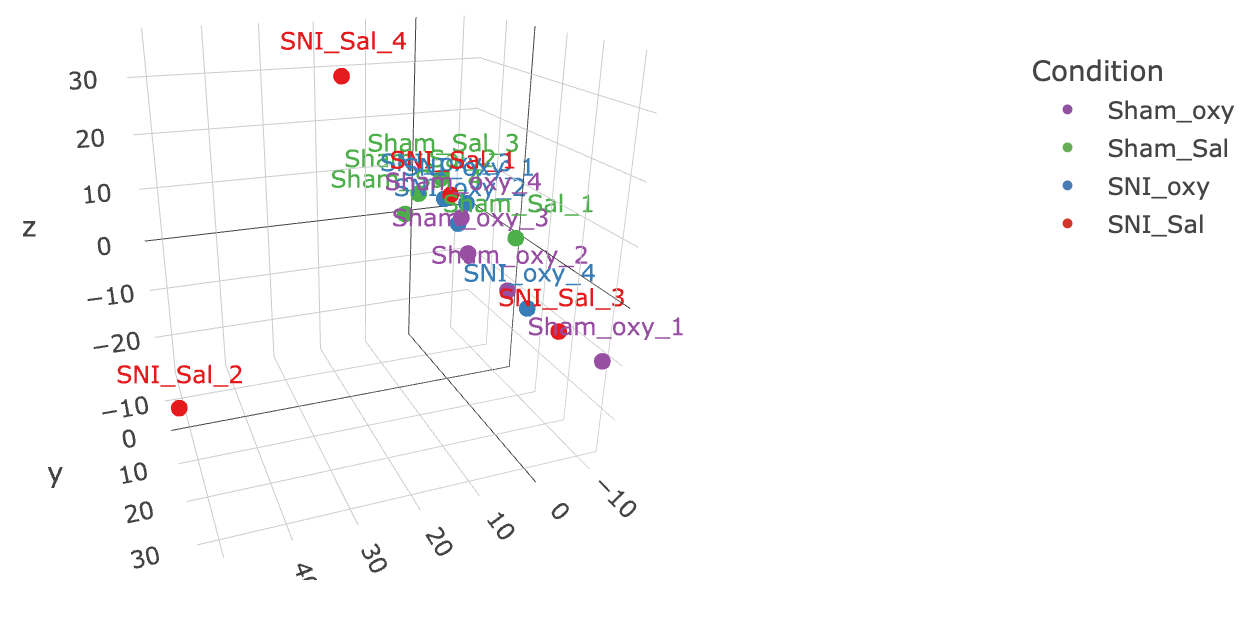

In [31]:
from IPython.display import Image, display

img_path1 = "/Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/nf_output/PCA.png"
display(Image(filename=img_path1))

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

Our Analysis:
- SNI_Sal vs SNI_oxy: 18 differential expressed genes
- Sham_Sal vs Sham_oxy: 7 differential expressed genes

In the paper different comparisons were made, thus also different number of differential expressed genes were detected.

The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

These are different brain tissue types of the reward system.

- NAc (Nucleus Accumbens) – part of the ventral striatum, central to reward, motivation, and reinforcement learning.
- mPFC (medial Prefrontal Cortex) – cortical region involved in decision-making, executive control, and emotional regulation.
- VTA (Ventral Tegmental Area) – midbrain structure, major source of dopamine neurons projecting to limbic and cortical regions.

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Not really...

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentionned.

As different comparisons were made, also the venn diagram shows these different comparisons. 

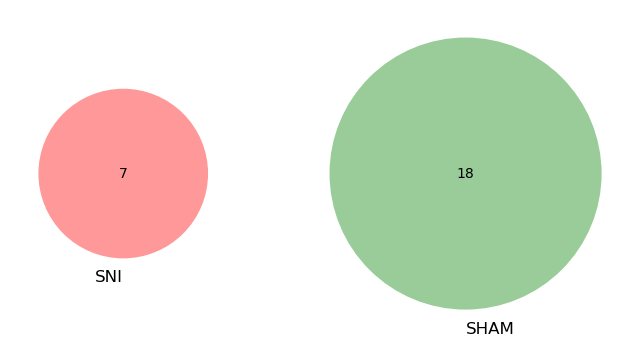

In [35]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

df_SNI = pd.read_csv("/Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/nf_output/tables/differential/condition_control_treated_test.deseq2.results_filtered.tsv", sep="\t")
df_SHAM = pd.read_csv("/Users/nilswaffenschmidt/waffenschmidt/notebooks/day_03/diffAbundance/nf_output/tables/differential/condition_control_treated.deseq2.results_filtered.tsv", sep="\t")

# Gene sets
SNI = set(df_SNI["gene_id"].to_list())
SHAM = set(df_SHAM["gene_id"].to_list())

# 2-set Venn (mPFC vs NAc)
plt.figure(figsize=(8,8))
venn2([SNI, SHAM], set_labels=("SNI", "SHAM"))